In [65]:
import sys

sys.path.insert(0, r"/mnt/c/Users/Trez/Desktop/tudat-bundle/tudatpy/")
from tudatpy.data.mpc import BatchMPC
from tudatpy.data.horizons import HorizonsQuery
from tudatpy.data._biases import get_weights_VFCC17

from tudatpy.numerical_simulation import environment_setup
from tudatpy.interface import spice

import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os

from astroquery.mpc import MPC

import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from collections.abc import Iterable

import cartopy
from typing import Union, Tuple
import random
from astropy_healpix import HEALPix
import healpy
from astropy.units import Quantity
from astropy.time import Time

import seaborn as sns
import re
from typing import Union, Tuple

spice.load_standard_kernels()

In [66]:
b = BatchMPC()
c = BatchMPC()
b.get_observations(["433", "1", "4"])
# b.get_observations(["433"])

tab = b.table

In [67]:
biases = get_weights_VFCC17(
    MPC_codes=b.table.number,
    epochUTC=b.table.epochUTC,
    observation_type=b.table.note2,
    observatory=b.table.observatory,
    star_catalog=b.table.catalog,
    return_full_table=True,
)
# biases = get_weights_VFCC17(mpc_table=b.table, return_full_table=True)

# print(biases)

# print(biases.query("observations_on_epoch  > 4"))
tab = (
    biases.loc[
        :,
        [
            "observatory",
            # "epochJD",
            "epochJD_int",
            "note2",
            "epochJD_tz_int",
            "epochJD_tz_int2",
            "jd_tz",
            "approx_tz",
            "epochUTC",
            "weight_pre",
            "weight",
            "observations_on_epoch",
        ],
    ]
    .query("observations_on_epoch  > 4")
    # .iloc[-100:-60]
    # .query("observatory =='C57'")
    # .query("observatory =='637'")
    # .groupby("observatory")
    # .count()
    # .sort_values("observations_on_epoch")
    # .tail(40)
)
print(tab)

      observatory  epochJD_int note2  epochJD_tz_int  epochJD_tz_int2  \
187           020   2439524.31     A       2439524.0       2439524.33   
188           020   2439524.32     A       2439524.0       2439524.34   
189           020   2439524.32     A       2439524.0       2439524.34   
190           020   2439524.32     A       2439524.0       2439524.34   
191           020   2439524.32     A       2439524.0       2439524.34   
...           ...          ...   ...             ...              ...   
30001         D08   2456324.34     C       2456324.0       2456324.37   
30002         D08   2456324.37     C       2456324.0       2456324.39   
30003         D08   2456324.39     C       2456324.0       2456324.42   
30004         D08   2456324.42     C       2456324.0       2456324.44   
30005         D08   2456324.44     C       2456324.0       2456324.47   

          jd_tz  approx_tz                   epochUTC  weight_pre    weight  \
187    0.020279   0.486693 1967-02-02 19:25:

Text(0.5, 0.98, 'Shifted times of observations for N>4 deweighting (Eros, 1898-2024, N>4)')

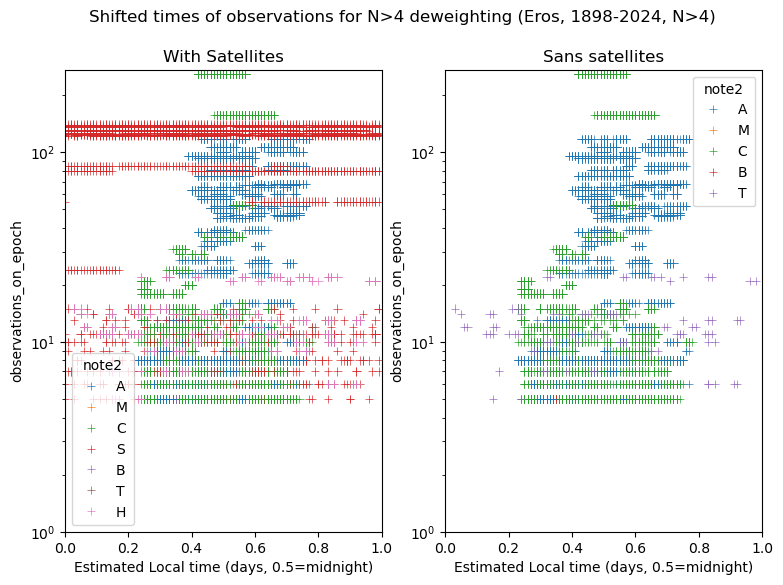

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))

tab = tab.assign(approx_time=lambda x: np.modf(x.epochJD_tz_int2)[0])

sns.scatterplot(
    data=tab,
    x="approx_time",
    y="observations_on_epoch",
    marker="+",
    hue="note2",
    ax=ax1,
)
sns.scatterplot(
    data=tab.query("note2 != 'S' & note2 != 'H'"),
    x="approx_time",
    y="observations_on_epoch",
    marker="+",
    hue="note2",
    ax=ax2,
)

ax1.set_xlim(0, 1.0)
ax2.set_xlim(0, 1.0)
ax1.set_xlim(0, 1.0)
ax2.set_xlim(0, 1.0)
ax1.set_ylim(1, None)
ax2.set_ylim(1, None)
ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.set_xlabel("Estimated Local time (days, 0.5=midnight)")
ax2.set_xlabel("Estimated Local time (days, 0.5=midnight)")
ax1.set_title("With Satellites")
ax2.set_title("Sans satellites")
fig.suptitle(f"Shifted times of observations for N>4 deweighting (Eros, {tab.epochUTC.min().year}-2024, N>4)")

Text(0.5, 0.98, 'Shifted times of observations for N>4 deweighting (Eros, 1994-2024, N>4)')

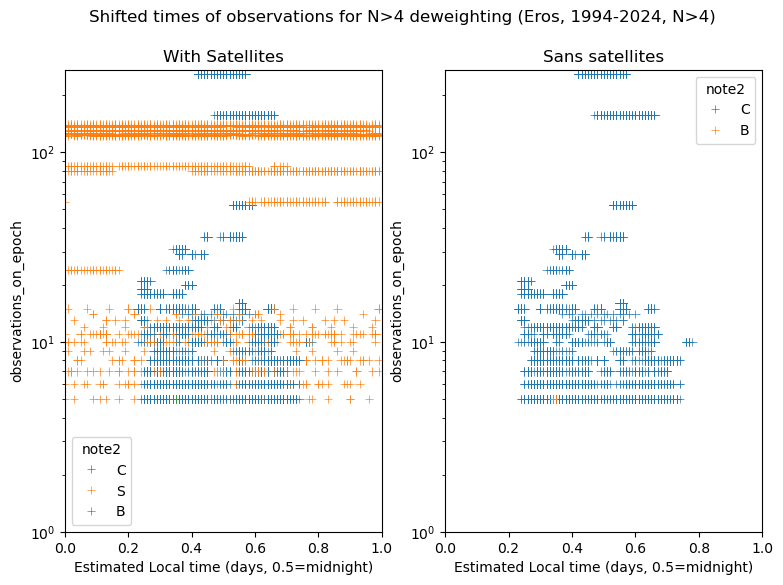

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))

tab = tab.assign(approx_time=lambda x: np.modf(x.epochJD_tz_int2)[0])

startdate = datetime.datetime(1994, 1, 1)
sns.scatterplot(
    data=tab.query("epochUTC>@startdate"),
    x="approx_time",
    y="observations_on_epoch",
    marker="+",
    hue="note2",
    ax=ax1,
)
sns.scatterplot(
    data=tab.query("epochUTC>@startdate").query("note2 != 'S' & note2 != 'H'"),
    x="approx_time",
    y="observations_on_epoch",
    marker="+",
    hue="note2",
    ax=ax2,
)

ax1.set_xlim(0, 1.0)
ax2.set_xlim(0, 1.0)
ax1.set_ylim(1, None)
ax2.set_ylim(1, None)
ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.set_xlabel("Estimated Local time (days, 0.5=midnight)")
ax2.set_xlabel("Estimated Local time (days, 0.5=midnight)")
ax1.set_title("With Satellites")
ax2.set_title("Sans satellites")
fig.suptitle(f"Shifted times of observations for N>4 deweighting (Eros, {startdate.year}-2024, N>4)")

https://minorplanetcenter.net/iau/info/OpticalObs.html

What to do for "T   Meridian or transit circle" observations?